In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dfs = []
parent_file_location = os.path.dirname(os.path.abspath(os.getcwd()))
latnecy_data_path = os.path.join(parent_file_location,'results','latency','secure')
for root, dir,files in os.walk(latnecy_data_path):
    for file in files:
        if file == 'raw_data.csv':
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dfs.append(df)
raw_df_secure = pd.concat(dfs, ignore_index=True)
success_df_secure = raw_df_secure[raw_df_secure['return_code'] == 200]
success_df_secure['latency'] = success_df_secure['latency']*1000
success_df_secure.head()

,return_code,payload,latency
0,200,"{""signature"":""0x951f5c848fa7e36aa214c59a09417f...",0.044937
1,200,"{""signature"":""0xa6fd63b8ae6d1b83efb3d5d66fd2f4...",0.039180
2,200,"{""signature"":""0xb089c92abf77d359d3d06db73b06f5...",0.040936
3,200,"{""signature"":""0xa2697c7ba4e1e962597e8d5ed2fc15...",0.046199
4,200,"{""signature"":""0xae28f6b72961bb5eb0bfd57b81da2c...",0.042549


In [3]:
success_df_secure.shape

(5000, 3)

In [ ]:
dfs = []
parent_file_location = os.path.dirname(os.path.abspath(os.getcwd()))
latnecy_data_path = os.path.join(parent_file_location,'results','latency','unsecure')
for root, dir,files in os.walk(latnecy_data_path):
    for file in files:
        if file == 'raw_data.csv':
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dfs.append(df)
raw_df_unsecure = pd.concat(dfs, ignore_index=True)
raw_df_unsecure.head()
success_df_unsecure = raw_df_unsecure[raw_df_unsecure['return_code'] == 200]
success_df_unsecure['latency'] = success_df_unsecure['latency']*1000
success_df_unsecure.head()

,return_code,payload,latency
0,200,"{""signature"":""0xa13cefa77e82f909fd236942687924...",0.141858
1,200,"{""signature"":""0x91f006b0f0bbdbb14d13b5ec1dab47...",0.024722
2,200,"{""signature"":""0xa77926a8489ddd325f3a2067082d08...",0.021531
3,200,"{""signature"":""0x8b3cd7f60934da35e17a554b672cb0...",0.123442
4,200,"{""signature"":""0xa39ee669d024ab932eb08d9a47199c...",0.137779


In [5]:
success_df_unsecure.shape

(5000, 3)

In [6]:
percentiles = [25,59,75,95,99]
secure_stats = {}
secure_stats['percentiles'] = success_df_secure['latency'].quantile([p/100 for p in percentiles])
secure_stats['mean'] = success_df_secure['latency'].mean()

unsecure_stats = {}
unsecure_stats['percentiles'] = success_df_unsecure['latency'].quantile([p/100 for p in percentiles])
unsecure_stats['mean'] = success_df_unsecure['latency'].mean()


In [7]:
percentile_df = pd.DataFrame({
    'Percentiles': percentiles,
    'Secure': secure_stats['percentiles'].values,
    'UnSecure': unsecure_stats['percentiles'].values
})

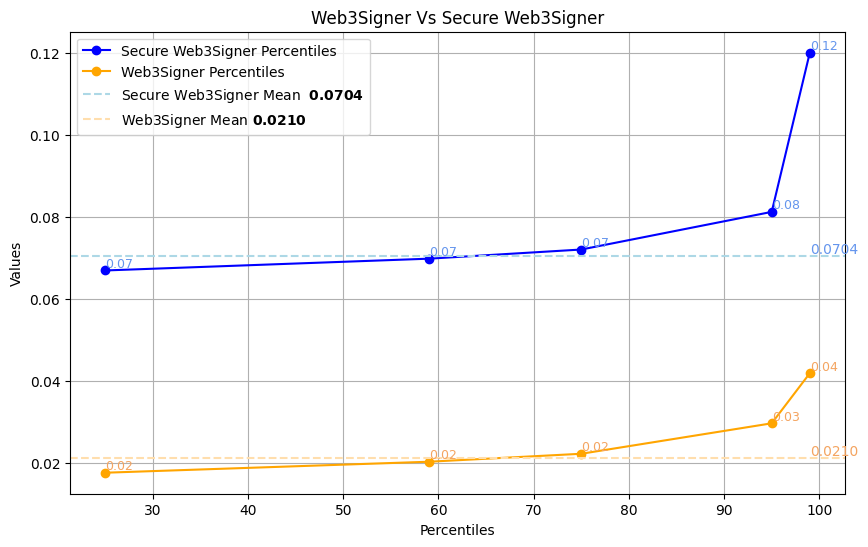

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(percentile_df['Percentiles'], percentile_df['Secure'], label='Secure Web3Signer Percentiles', marker='o',  color='blue')
plt.plot(percentile_df['Percentiles'], percentile_df['UnSecure'], label='Web3Signer Percentiles', marker='o',  color='orange')

# Annotate DF1 Percentiles
for x, y in zip(percentile_df['Percentiles'], percentile_df['Secure']):
    plt.text(x, y, f'{y:.2f}', color='cornflowerblue', fontsize=9, ha='left', va='bottom')

# Annotate DF2 Percentiles
for x, y in zip(percentile_df['Percentiles'], percentile_df['UnSecure']):
    plt.text(x, y, f'{y:.2f}', color='sandybrown', fontsize=9, ha='left', va='bottom')

# Add mean values to the plot
secure_mean = secure_stats['mean']
unsecure_mean = unsecure_stats['mean']


plt.axhline(secure_mean, color='lightblue', linestyle='--', label=f'Secure Web3Signer Mean  $\\mathbf{{{secure_mean:.4f}}}$')
plt.text(percentiles[-1], secure_mean, f'{secure_mean:.4f}', color='cornflowerblue', verticalalignment='bottom')

plt.axhline(unsecure_mean, color='navajowhite', linestyle='--', label=f'Web3Signer Mean $\\mathbf{{{unsecure_mean:.4f}}}$')
plt.text(percentiles[-1], unsecure_mean, f'{unsecure_mean:.4f}', color='sandybrown', verticalalignment='bottom')

plt.title('Web3Signer Vs Secure Web3Signer')
plt.xlabel('Percentiles')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()